<a href="https://colab.research.google.com/github/satianferdy/TF_Object_Detection2020/blob/master/Training_Darknet_Yolo_using_Custom_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Train YOLOv3 Model for Custom Dataset
___

### Before started!
- navigate to `Runtime` menu, and choose `change runtime type`,
- then, change `hardware acceleration` to `GPU`
- click `connect` button in top-right colab

In [1]:
import os
import cv2 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cv2.__version__

'4.1.2'

# 1. Prepare Dataset & Download Pretrained Model

- Upload Dataset

In [4]:
%cd /content

import shutil
from zipfile import ZipFile
from google.colab import files
from os import path

print("Upload `dataset.zip` to colab :")
print("-"*20)

uploaded = files.upload()
  
for fileName, data in uploaded.items():
  with open('dataset.zip', 'wb') as f:
    f.write(data)
    f.close()
    print('saved dataset (.zip) file ' + fileName)

ds = ZipFile(fileName)
ds.extractall()
os.remove(fileName)
print('Extracted zip file ' + fileName)

/content
Upload `dataset.zip` to colab :
--------------------


Saving dataset.zip to dataset.zip
saved dataset (.zip) file dataset.zip
Extracted zip file dataset.zip


- Download `fully trained weights` weight (`.weight`) Yolo Model

In [5]:
# Get tiny YOLO v3 weights & config
!mkdir /content/dataset/models/
%cd /content/dataset/models/

!wget https://pjreddie.com/media/files/yolov3-tiny.weights
!wget https://pjreddie.com/media/files/yolov3.weights

/content/dataset/models
--2022-06-19 20:35:03--  https://pjreddie.com/media/files/yolov3-tiny.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35434956 (34M) [application/octet-stream]
Saving to: ‘yolov3-tiny.weights’

yolov3-tiny.weights 100%[===================>]  33.79M  12.4MB/s    in 2.7s    

2022-06-19 20:35:07 (12.4 MB/s) - ‘yolov3-tiny.weights’ saved [35434956/35434956]

--2022-06-19 20:35:07--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  18.4MB/s    in 14s     

2022-06-19 20:35:22 (16.9 MB/s) - ‘yolov3.weights’ saved [248

# 2. Cloning and compiling Darkent Framework.
<img src="https://pbs.twimg.com/profile_images/865698590122844160/Kg5dYKkG.jpg" width="100"></img><br>
In this step we'll clone the darkent repo and compile it. 
* Clone Repo
* Compile Darknet
* Copy compiled version to Drive

In [6]:
# Leave this code uncommented on the very first run of your notebook or if you ever need to recompile darknet again.
# Comment this code on the future runs.
%cd /content/
!git clone https://github.com/AlexeyAB/darknet.git
%cd darknet

# Check the folder
!ls

/content
Cloning into 'darknet'...
remote: Enumerating objects: 15424, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 15424 (delta 0), reused 1 (delta 0), pack-reused 15423
Receiving objects: 100% (15424/15424), 14.06 MiB | 17.83 MiB/s, done.
Resolving deltas: 100% (10362/10362), done.
/content/darknet
3rdparty		darknet_video.py       net_cam_v4.sh
build			data		       README.md
build.ps1		image_yolov3.sh        results
cfg			image_yolov4.sh        scripts
cmake			include		       src
CMakeLists.txt		json_mjpeg_streams.sh  vcpkg.json
DarknetConfig.cmake.in	LICENSE		       video_yolov3.sh
darknet_images.py	Makefile	       video_yolov4.sh
darknet.py		net_cam_v3.sh


- Edit /content/darknet/Makefile file inside `darknet/` dir, change,
```
GPU=0
CUDNN=0
CUDNN_HALF=0
OPENCV=0
```
- to,
```
GPU=1
CUDNN=0
CUDNN_HALF=0
OPENCV=1
```

In [7]:
#Compile Darknet
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_

# 2. Test Darknet (Inference Tiny Yolo V3) - COCO Dataset

- Upload image to Colab

In [8]:
%cd /content/

import os
from google.colab import files

print("Upload image to Colab!")
uploaded = files.upload() 
for name, data in uploaded.items():
  with open('image1.jpg', 'wb') as f:
    f.write(data)
    os.remove(name)
    print ('saved file as as image1.jpg')

/content
Upload image to Colab!


Saving gajah2.jpeg to gajah2.jpeg
saved file as as image1.jpg


- show image

In [9]:
def show_image(image_path):
  img = cv2.imread(image_path)

  plt.figure(figsize=(10,10))
  plt.imshow(img[:,:,::-1])

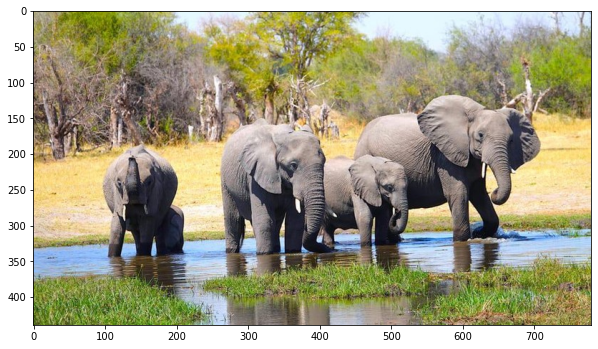

In [10]:
image_path = '/content/image1.jpg'

show_image(image_path)

/content/darknet
 CUDA-version: 11010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 ->   26 x  26 x 128 0.000 BF
   

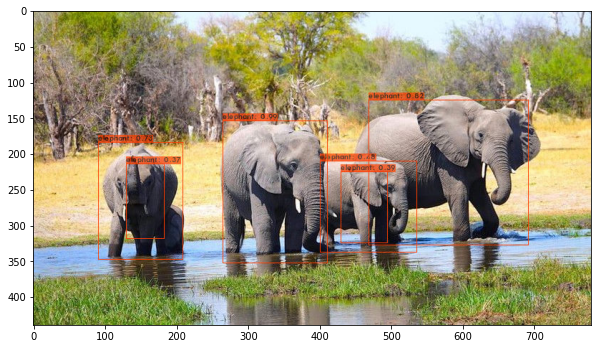

In [12]:
%cd /content/darknet/

# Execute darknet using tiny YOLOv3 model with pre-trained weights to detect objects
!./darknet detect cfg/yolov3-tiny.cfg /content/dataset/models/yolov3-tiny.weights /content/image1.jpg -dont-show

# Show the result using the helper imgShow()
show_image('/content/darknet/predictions.jpg')

# 3. Training Tiny YOLO V3 using Darknet Framework




#### 3.1 Download Pre-trained Base Model model :
  - `yolov3-tiny.conv.11` for Tiny Yolo V3
  - `darknet53.conv.74` for Yolo V3
  - List pre-trained model : https://github.com/AlexeyAB/darknet#how-to-train-to-detect-your-custom-objects<br><br>
#### [IMPORTANT NOTE!]
  > `darknet53.conv.74` or `yolov3-tiny.conv.11` is intial yolo weights (base model) for training custom data.

  > `yolov3.weights` or `yolov3-tiny.weight` is `fully trained weights` which you can use for detecting.

In [13]:
!mkdir -p /content/dataset/models/
!mkdir -p /content/dataset/backup
%cd /content/dataset/models/

# copy config of Yolo V3 & Tiny Yolo V3
!cp /content/darknet/cfg/yolov3-tiny.cfg .
!cp /content/darknet/cfg/yolov3.cfg .

# download tiny yolo v3 pre-trained model from google drive using `gdown`
# !wget https://pjreddie.com/media/files/yolov3-tiny.conv.11
# !wget https://pjreddie.com/media/files/yolov3-tiny.weights
!gdown --id 18v36esoXCh-PsOKwyP2GWrpYDptDY8Zf

# download yolo v3 pre-trained model from pjreddie.com
!wget https://pjreddie.com/media/files/darknet53.conv.74

/content/dataset/models
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=18v36esoXCh-PsOKwyP2GWrpYDptDY8Zf 

--2022-06-19 20:40:55--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  18.5MB/s    in 9.5s    

2022-06-19 20:41:05 (1

### 3.2 Create & Edit necessary file (config, parameter, etc.)
- edit /content/dataset/models/yolov3-tiny.cfg or /content/dataset/models/yolov3.cfg file,
  - change `line 3` with `batch=1` to `batch=64`
  - change `line 4` with `subdivisions=1` to `subdivisions=2`
  - change `line 20` with `max_batches = 500200` to value we are prefered. 
  - change `line 21` with `steps=400000,450000` (adjust learning rate at step `400000,450000`) to value we are prefered and must lower than `max_batches`.
  - change `line 135` and `line 177` eith `classes=80` to `classes=xx` with xx is number of classes in our custom dataset
  - change `line 127` and `line 171` with `filters=255` to number of result (classes+5)x3.

- Create `train.txt` & `test.txt`

In [14]:
!find /content/dataset/images/test/*.jpg > /content/dataset/data/train.txt
!find /content/dataset/images/train/*.jpg > /content/dataset/data/test.txt

- create file `obj.data`,

In [15]:
!touch /content/dataset/data/obj.data

- edit /content/dataset/data/obj.data with this content,
  ```
classes = <NUMBER OF CLASSES>
names = /<LOCATION TO>/object-detection.names
train = /<LOCATION TO>/train.txt
valid = /<LOCATION TO>/test.txt
backup = /<LOCATION TO>/backup/
  ```

### 3.3 Run Train Yolo Model

In [16]:
%cd /content/darknet/
!./darknet detector train \
    /content/dataset/data/obj.data \
    /content/dataset/models/yolov3-tiny.cfg \
    /content/dataset/models/yolov3-tiny.conv.15 \
    -dont_show 

Streaming output truncated to the last 5000 lines.
 total_bbox = 30331, rewritten_bbox = 0.000000 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 16 Avg (IOU: 0.601691), count: 32, class_loss = 0.581677, iou_loss = 0.639729, total_loss = 1.221406 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 23 Avg (IOU: 0.000000), count: 1, class_loss = 0.001207, iou_loss = 0.000000, total_loss = 0.001207 
 total_bbox = 30363, rewritten_bbox = 0.000000 % 
]2;475/1000: loss=0.6 hours left=0.2
 475: 0.614171, 0.669970 avg loss, 0.000051 rate, 0.595126 seconds, 30400 images, 0.245357 hours left
Loaded: 0.788777 seconds - performance bottleneck on CPU or Disk HDD/SSD
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 16 Avg (IOU: 0.571580), count: 32, class_loss = 0.590647, iou_loss = 0.780764, total_loss = 1.371411 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 23 Avg (IOU: 0.000000), count: 1, class_loss = 0.001212, iou_l

### 3.4 Test Model Trained Yolo Model 

- Upload `ironman` or `batman` image,

In [26]:
%cd /content/
%mkdir test_images -p

from google.colab import files

print("Upload image to Colab!")
uploaded = files.upload() 
for name, data in uploaded.items():
  with open('test_images/' + name, 'wb') as f:
    f.write(data)
    print ('saved file', name)

/content
Upload image to Colab!


Saving ball_207.jpg to ball_207.jpg
saved file ball_207.jpg


/content/darknet
 CUDA-version: 11010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 2, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 ->   26 x  26 x 128 0.000 BF
   

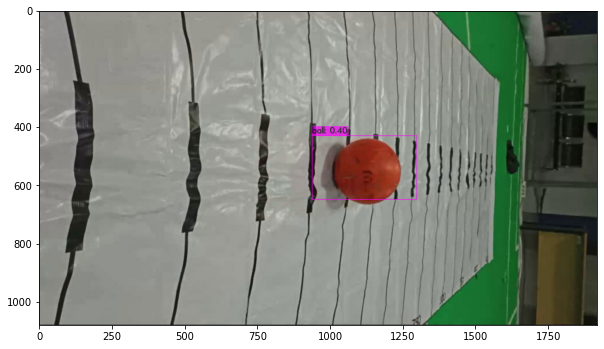

In [31]:
%cd /content/darknet/

# Execute darknet using tiny YOLOv3 model with pre-trained weights to detect objects
!./darknet detector test \
  /content/dataset/data/obj.data \
  /content/dataset/models/yolov3-tiny.cfg \
  /content/dataset/backup/yolov3-tiny_final.weights \
  /content/test_images/ball_207.jpg \
  -dont-show

# Show the result using the helper imgShow()
show_image('/content/darknet/predictions.jpg')

# 4. Zip & Download Yolo Model

In [28]:
%cd /content/dataset/models
!cp /content/dataset/backup/yolov3-tiny_final.weights /content/dataset/backup/yolov3-tiny-custom.weights
!zip -r yolo_model.zip /content/dataset/backup/yolov3-tiny-custom.weights /content/dataset/models/yolov3-tiny.cfg

from google.colab import files
files.download("yolo_model.zip")

/content/dataset/models
  adding: content/dataset/backup/yolov3-tiny-custom.weights (deflated 7%)
  adding: content/dataset/models/yolov3-tiny.cfg (deflated 76%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

___
# Original Creator 
- Site : http://blog.ibanyex.info/
- Notebook : https://colab.research.google.com/drive/1lTGZsfMaGUpBG4inDIQwIJVW476ibXk_#scrollTo=13fRzkiQiPhW

# Main Source
- YOLOv3 (https://arxiv.org/abs/1804.02767)
- Darknet - Yolo (https://pjreddie.com/darknet/yolo/)